# ECSE 415
## Assignment 4
### Abbas Yadollahi - 260680343

# 1. Data Acquisition

In [303]:
import os
import cv2
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts

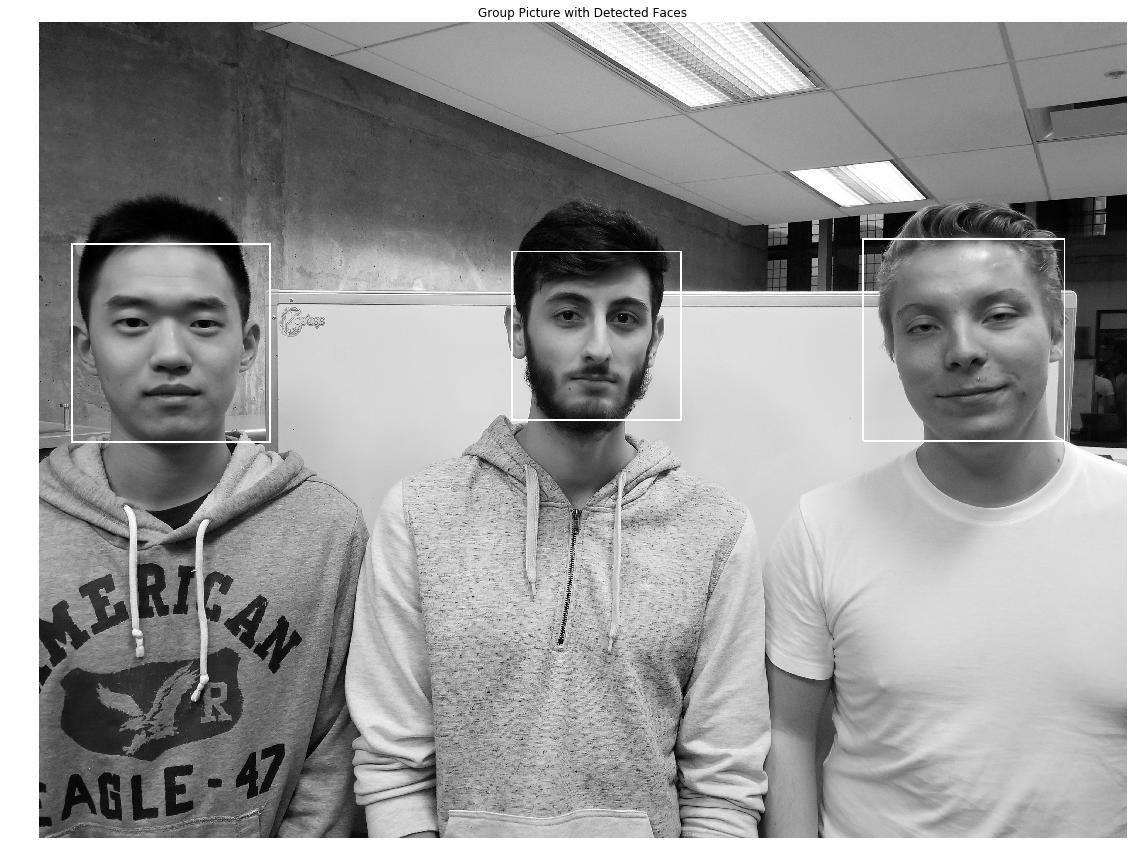

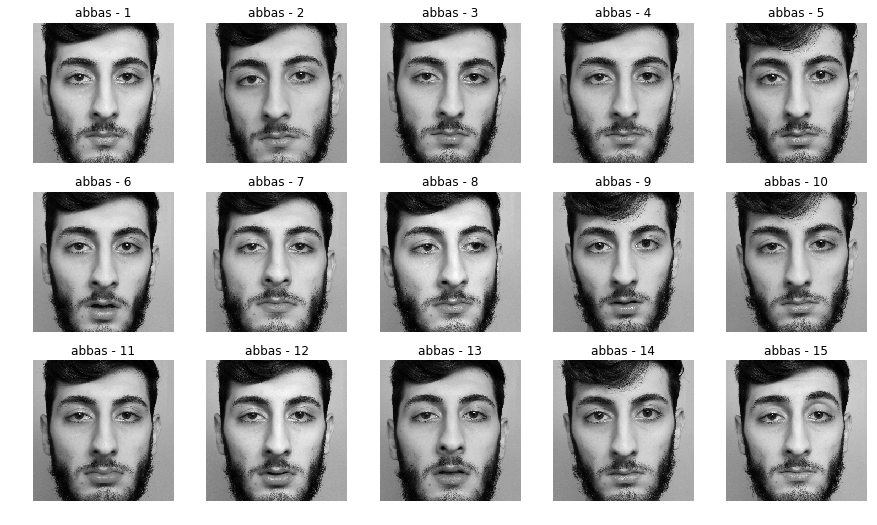

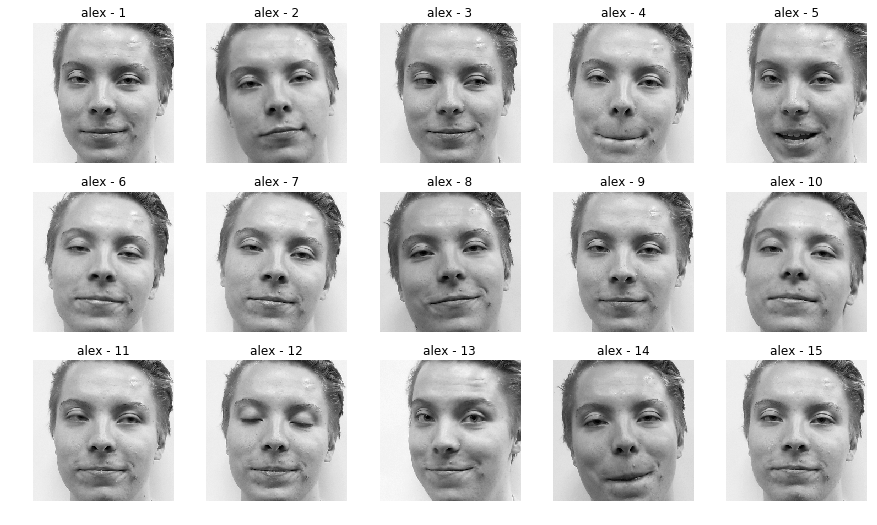

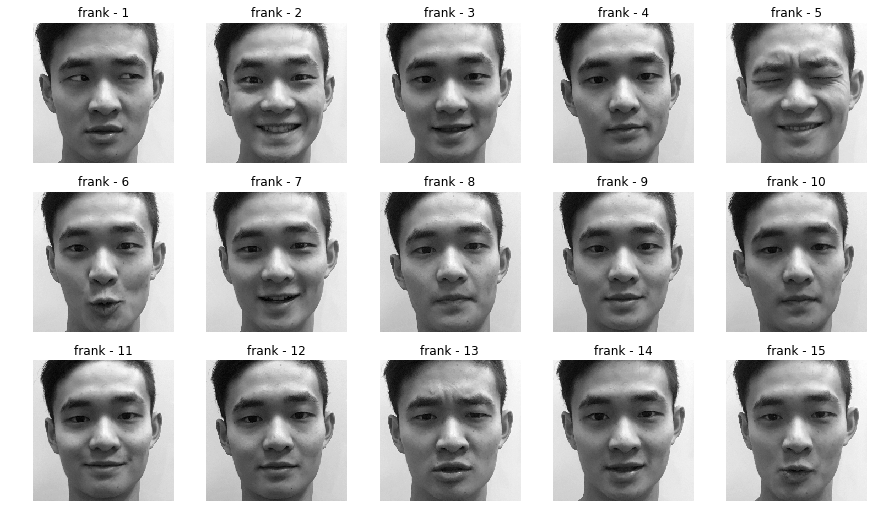

In [148]:
def plotFigures(figures, size=5):
    """
    :param figures: List of figures to plot
    :param title: Title to give to the figures
    :param size: Width size of the grid
    """

    for img_set, images in figures.items():
        plt.figure(figsize=(15, 15))
        for i, img in enumerate(images, 1):
            plt.subplot(size, size, i), plt.imshow(img, 'gray')
            plt.title('{} - {}'.format(img_set, i)), plt.axis('off')
        plt.show()

test_path = 'dataset/test/group.jpg'
train_path = 'dataset/train/'

# Detect all faces in group picture
face_cascade = cv2.CascadeClassifier(os.path.join(cv2.data.haarcascades, 'haarcascade_frontalface_default.xml'))
group = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
group_faces = face_cascade.detectMultiScale(group, 1.2, 10)

# Draw a box around each detected face
group_copy = group.copy()
for (x, y, w, h) in group_faces:
    cv2.rectangle(group_copy, (x, y), (x+w, y+h), (255, 255, 255), 5)

# Display test image
plt.figure(figsize=(30, 15))
plt.title("Group Picture with Detected Faces")
plt.imshow(group_copy, 'gray'), plt.axis('off')
plt.show()

# Read all training images
X, Y = [], []
train_sets = {}
size = (256, 256)
for img_set in os.listdir(train_path):
    images = []
    for img in os.listdir(os.path.join(train_path, img_set)):
        face = cv2.imread(os.path.join(train_path, img_set, img), cv2.IMREAD_GRAYSCALE)
        p = face_cascade.detectMultiScale(face, 1.05, 15)
        if len(p):
            x, y, w, h = p[0]
            face = face[y:y+h, x:x+w]
        face = cv2.resize(face, size)
        images.append(face)
        X.append(face), Y.append(img_set)
    train_sets[img_set] = images

# Display training images
plotFigures(train_sets)

**Describe how you selected the images with respect to the conditions of the detection/classification methods.**

Gang

(30, 30)
[4.79057820e-01 2.35508998e-01 5.27266422e-02 3.75778803e-02
 2.90618884e-02 2.07658278e-02 1.81105437e-02 1.68813682e-02
 1.59731972e-02 1.11271751e-02 1.03348276e-02 9.50364384e-03
 8.43018790e-03 7.90016976e-03 6.20667193e-03 5.29334649e-03
 4.64323570e-03 4.39386307e-03 3.66118756e-03 3.55518129e-03
 3.38490159e-03 3.02374142e-03 2.84910306e-03 2.00296935e-03
 1.84887798e-03 1.77495030e-03 1.75957607e-03 1.39202678e-03
 1.25019730e-03 5.08514497e-31]


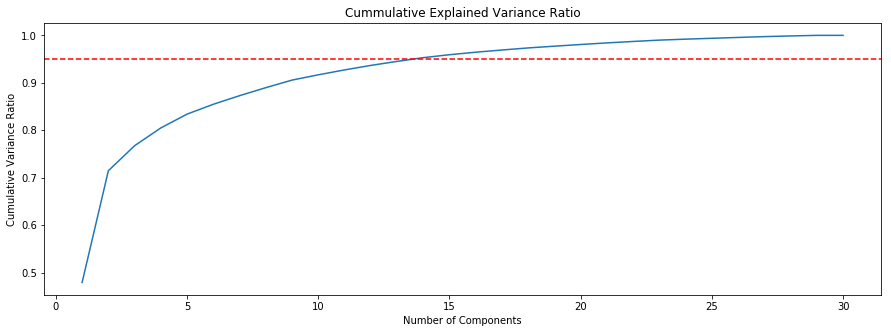

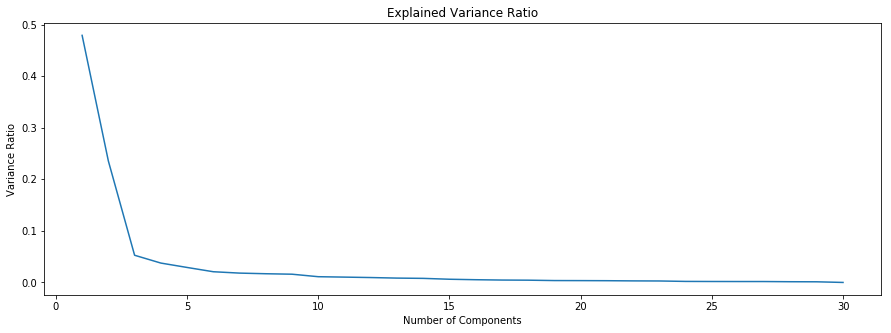

In [308]:
# Split the data using train_test_split
X_train, X_test, Y_train, Y_test = tts(X, Y, train_size=2/3)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Create PCA and transform the test set
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Get the variance explained by every principal component
print(X_train_pca.shape)
print(pca.explained_variance_ratio_)
var_size = pca.explained_variance_ratio_.size

# Plot the cumulative summation of the explained variance
plt.figure(figsize=(15, 5))
plt.plot(range(1, var_size+1), np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components'), plt.ylabel('Cumulative Variance Ratio')
plt.title('Cummulative Explained Variance Ratio')
plt.show()

# Plot explained variance against the number of components
plt.figure(figsize=(15, 5))
plt.plot(range(1, var_size+1), pca.explained_variance_ratio_)
plt.xlabel('Number of Components'), plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio')
plt.show()

In [309]:
# Create PCA with 14 components and transform the test set
start = time.time()
pca14 = PCA(n_components=14)
pca14.fit_transform(X_train), pca14.transform(X_test)
print('PCA using 14 components')
print(f'Variance Ratio: {pca14.explained_variance_ratio_[-1]}')
print(f'Computation time: {time.time()-start}\n')

# Create PCA with 30 components and transform the test set
pca30 = PCA(n_components=30)
pca30.fit_transform(X_train), pca30.transform(X_test)
print('PCA using 30 components')
print(f'Variance Ratio: {pca30.explained_variance_ratio_[-1]}')
print(f'Computation time: {time.time()-start}')

PCA using 14 components
Variance Ratio: 0.007900165633763308
Computation time: 0.9511969089508057

PCA using 30 components
Variance Ratio: 5.085144972394983e-31
Computation time: 1.73138427734375


**Do you need all the vectors to represent the data?**

Gang

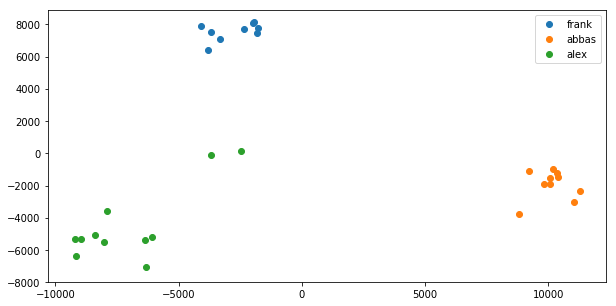

In [311]:
people = set(Y)

plt.figure(figsize=(10, 5))
for mans in people:
    x_set = X_train_pca[Y_train == mans, :]
    plt.scatter(x_set[:,0], x_set[:,1])
    plt.legend(people)

plt.show()

In [312]:
# Use K-nearest neighbors to evaluate clustering on eigenspace and original pixel space
start = time.time()
knc = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knc.fit(X_train_pca, Y_train)
pred = knc.predict(X_train_pca)
print(f'Eigenspace accuracy: {accuracy_score(Y_train, pred)}')
print(f'Computation time: {time.time()-start}\n')

start = time.time()
knc = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knc.fit(X_train, Y_train)
pred = knc.predict(X_train)
print(f'Pixel space accuracy: {accuracy_score(Y_train, pred)}')
print(f'Computation time: {time.time()-start}')

Eigenspace accuracy: 1.0
Computation time: 0.005701780319213867

Pixel space accuracy: 1.0
Computation time: 0.15842056274414062
